This is the map using the k-means clustering algorithm.


/Users/karthikmittal/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


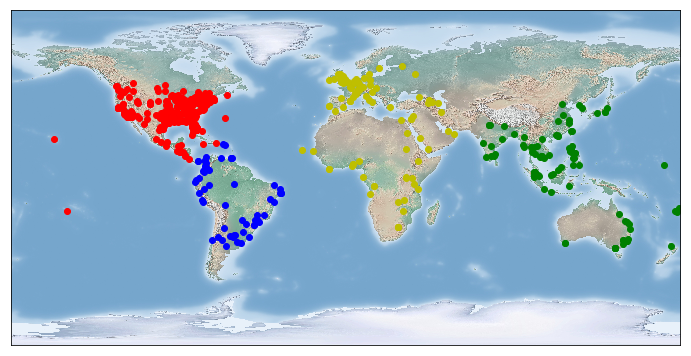

This is the map using the DBSCAN clustering algorithm.


/Users/karthikmittal/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


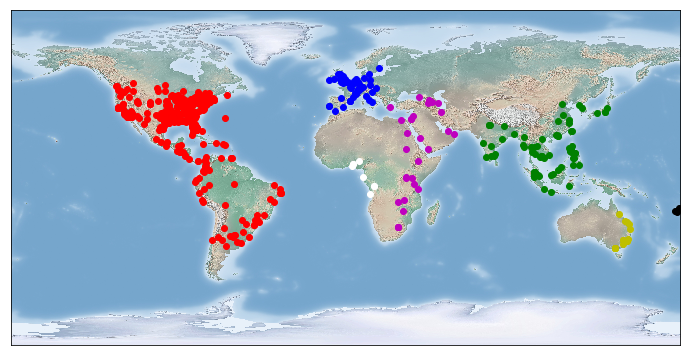

Here is the table consisting of the k-means label for all the geographical points.
     latitude  longitude            cities countrycode  kmeans_label  db_label
0    25.77427  -80.19366             Miami          US             0         0
1    40.71427  -74.00597     New York City          US             0         0
2    25.79065  -80.13005       Miami Beach          US             0         0
3    -8.05389  -34.88111            Recife          BR             3         0
4    32.78306  -96.80667            Dallas          US             0         0
5   -14.83333  -64.90000          Trinidad          BO             3         0
6    29.76328  -95.36327           Houston          US             0         0
8    33.74900  -84.38798           Atlanta          US             0         0
10   25.82176  -80.24116       Brownsville          US             0         0
12  -31.53750  -68.53639          San Juan          AR             3         0
13   29.30135  -94.79770         Galveston      

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.basemap import Basemap
from sklearn.cluster import DBSCAN
from math import radians, cos, sin, asin, sqrt

df = pd.read_csv('FindingGeographicLocation.csv')
df
#Removing missing values
del df['Unnamed: 0']
new_dict = {'latitude' : [], 'longitude' : []}
cities_dict = {'latitude': [], 'longitude': [], 'cities': [], 'countrycode': []}
for i in df['latitude']:
    new_dict['latitude'].append(i)
    cities_dict['latitude'].append(i)
for i in df['longitude']:
    new_dict['longitude'].append(i)
    cities_dict['longitude'].append(i)
for i in df['cities']:
    cities_dict['cities'].append(i)
for i in df['countrycodes']:
    cities_dict['countrycode'].append(i)
    
new_df = pd.DataFrame(data = new_dict)
new_df_with_cities = pd.DataFrame(data = cities_dict)
new_df_with_cities_db_scan = pd.DataFrame(data = cities_dict)

new_df = new_df.dropna(thresh = 2)
new_df_with_cities = new_df_with_cities.dropna(thresh = 2)
new_df_with_cities_db_scan = new_df_with_cities_db_scan.dropna(thresh = 2)


#Elbow Curve
clusters = range(1, 20)
kmeans_elbow = [KMeans(n_clusters=i) for i in clusters]
score = [kmeans_elbow[i].fit(new_df).score(new_df) for i in range(len(kmeans_elbow))]
#plt.plot(clusters, score)
#plt.xlabel('Number of Clusters')
#plt.ylabel('Score')
#plt.title('Elbow Curve')
#plt.show()

new_df_with_cities["kmeans_label"] = kmeans_elbow[3].fit(new_df).labels_
new_df["kmeans_label"] = kmeans_elbow[3].fit(new_df).labels_


#Implementing K-Means Clustering Algorithm (not on global map)
# kmeans = KMeans(n_clusters=4).fit(new_df)
# centroids = kmeans.cluster_centers_
# print(centroids)
# plt.scatter(new_df['latitude'], new_df['longitude'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
# plt.show()

#Plotting the points on Basemap with the k-means algorithm (4 clusters)
print ("This is the map using the k-means clustering algorithm.")
map_plotter = Basemap()
fig = plt.figure(figsize=(12, 8))
coordinates = []
for index in new_df.index:
    coordinates.append((new_df['latitude'][index], new_df['longitude'][index]))
cluster_vals = {'0_long': [], '0_lat':[], '1_long': [], '1_lat':[], '2_long': [], '2_lat':[], '3_long': [], '3_lat':[]}
for index in new_df.index:
    cluster_vals[str(new_df['kmeans_label'][index])+'_long'].append(new_df['longitude'][index])
    cluster_vals[str(new_df['kmeans_label'][index])+'_lat'].append(new_df['latitude'][index])
for target,color in zip(['0', '1', '2', '3'], ['r', 'g', 'b', 'y']):
     indexs = new_df['kmeans_label'] == target
     map_plotter.scatter(cluster_vals[target+'_long'], cluster_vals[target+'_lat'], latlon=True, c = color)
     map_plotter.shadedrelief()
plt.show()

#Defining the distance function (Great Circle Distance)
def haversine(point_a, point_b):
    lon1, lat1 = point_a[0], point_a[1]
    lon2, lat2 = point_b[0], point_b[1]
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371
    return c * r

#Implementing the DBSCAN Algorithm
points = []
for index in new_df.index:
    points_inside = []
    points_inside.append(new_df['latitude'][index])
    points_inside.append(new_df['longitude'][index])
    points.append(points_inside)
clusters = DBSCAN(eps=1000, min_samples=3, metric=haversine).fit_predict(points)
just_cluster_info = []
for i, cluster in enumerate(clusters):
    just_cluster_info.append(cluster) 
new_df_with_cities_db_scan["db_label"] = just_cluster_info
new_df_with_cities["db_label"] = just_cluster_info
new_df["db_label"] = just_cluster_info

#Removing the outliers
new_df_with_cities_db_scan = new_df_with_cities_db_scan.loc[new_df_with_cities_db_scan['db_label']!=-1, ['latitude',
                            'longitude', 'cities', 'countrycode', 'db_label']]

#Plotting the points on Basemap with the DBSCAN Algorithm (7 clusters)
print ("This is the map using the DBSCAN clustering algorithm.")
fig = plt.figure(figsize=(12, 8))
coordinates = []
for index in new_df.index:
    coordinates.append((new_df['latitude'][index], new_df['longitude'][index]))
cluster_vals = {'0_long': [], '0_lat':[], '1_long': [], '1_lat':[], '2_long': [], '2_lat':[], '3_long': [], '3_lat':[],
               '4_long': [], '4_lat':[], '5_long': [], '5_lat':[], '6_long': [], '6_lat':[]}
for index in new_df_with_cities_db_scan.index:
    cluster_vals[str(new_df_with_cities_db_scan['db_label'][index])+'_long'].append(new_df_with_cities_db_scan['longitude'][index])
    cluster_vals[str(new_df_with_cities_db_scan['db_label'][index])+'_lat'].append(new_df_with_cities_db_scan['latitude'][index])
for target,color in zip(['0', '1', '2', '3', '4', '5', '6'], ['r', 'g', 'b', 'y', 'm', 'w', 'k']):
     indexs = new_df_with_cities_db_scan['db_label'] == target
     map_plotter.scatter(cluster_vals[target+'_long'], cluster_vals[target+'_lat'], latlon=True, c = color)
     map_plotter.shadedrelief()
plt.show()

print ("Here is the table consisting of the k-means label for all the geographical points.")
print (new_df_with_cities)

print ("Here is the table consisting of the DBSCAN label for all the geographical points.")
print (new_df_with_cities_db_scan)